In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]
rcParams.update({'font.size': 18})

In [2]:
# The data without outliers
datax = np.arange(1,11)
datay = np.array([0.2,0.5,0.3,0.7,1.0,1.5,1.8,2.0,2.3,2.2])
t1 = (datax,datay)
# Data with an outlier
datay = np.array([0.2,0.5,0.3,3.5,1.0,1.5,1.8,2.0,2.3,2.2])
t2 = (datax,datay)

In [3]:
# initial guess
x0 = np.array([1,1])

$E_{\infty} = max|x_0*x+y_0-f(x)|$

In [4]:
# Function definitions
# x0 is initial guess
# t is data
def maxe(x0,t):
    x,y=t
    return np.max(np.abs(x0[0]*x + x0[1]-y))
maxe(x0,t1)

8.8

$E_{1} = \sum|x_0*x+y_0-f(x)|$

In [5]:
def mae(x0,t):
    x,y=t
    return np.mean(np.abs(x0[0]*x + x0[1]-y))
mae(x0,t1)

5.25

$E_{2} = \sum(x_0*x+y_0-f(x))^2$

In [6]:
def lse(x0,t):
    x,y=t
    return np.mean(np.power(np.abs(x0[0]*x + x0[1]-y),2))
lse(x0,t1)

32.109

Optimization terminated successfully.
         Current function value: 0.230040
         Iterations: 59
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 0.138576
         Iterations: 56
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.028800
         Iterations: 54
         Function evaluations: 102


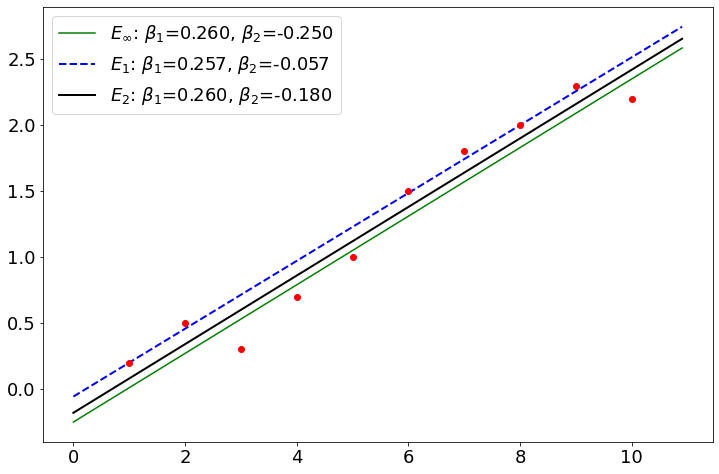

In [7]:
def fitting_data(data):
    # Minimize a function using the downhill simplex algorithm.
    p1 = scipy.optimize.fmin(maxe,x0,args=(data,))
    p2 = scipy.optimize.fmin(mae,x0,args=(data,))
    p3 = scipy.optimize.fmin(lse,x0,args=(data,))
    label_me= r'$E_\infty$: $\beta_1$={0:.3f}, $\beta_2$={1:.3f}'.format(p1[0],p1[1])
    label_mae= r'$E_1$: $\beta_1$={0:.3f}, $\beta_2$={1:.3f}'.format(p2[0],p2[1])
    label_lse= r'$E_2$: $\beta_1$={0:.3f}, $\beta_2$={1:.3f}'.format(p3[0],p3[1])

    xf = np.arange(0,11,0.1)
    # Evaluate a polynomial at specific values.
    y1 = np.polyval(p1,xf)
    y2 = np.polyval(p2,xf)
    y3 = np.polyval(p3,xf)

    plt.figure()
    plt.plot(xf,y1,color='green',label=label_me)
    plt.plot(xf,y2,'--',color='blue',linewidth=2,label=label_mae)
    plt.plot(xf,y3,color='k',linewidth=2,label=label_lse)
    x,y = data
    plt.plot(x,y,'o',color='r',linewidth=2)

    #plt.ylim(0,4)
    plt.legend()
    plt.show()
fitting_data(t1)

Optimization terminated successfully.
         Current function value: 1.464330
         Iterations: 52
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 0.364002
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 0.623418
         Iterations: 49
         Function evaluations: 92


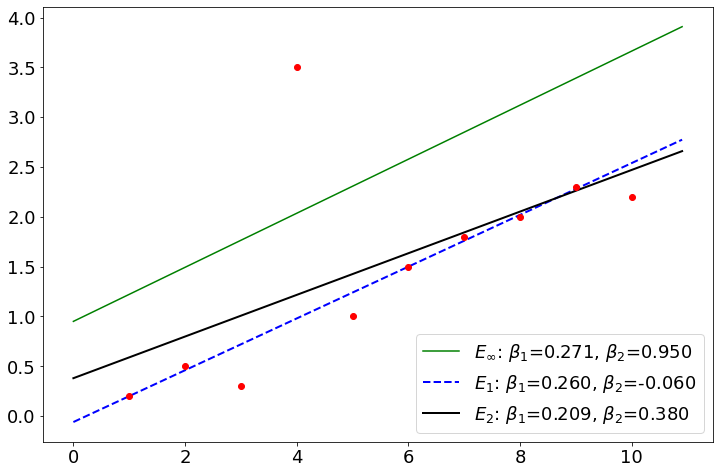

In [8]:
fitting_data(t2)

$E_{p} = \sum(x_0*x+y_0-f(x))^p$

In [9]:
def mpe(x0,t,po):
    x,y=t
    return np.mean(np.power(np.abs(x0[0]*x + x0[1]-y),po))
mpe(x0,t1,3)

216.23250000000002

Optimization terminated successfully.
         Current function value: 0.364002
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 0.623418
         Iterations: 49
         Function evaluations: 92
Optimization terminated successfully.
         Current function value: 1.003339
         Iterations: 48
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: 1.468952
         Iterations: 45
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 2.094834
         Iterations: 41
         Function evaluations: 79


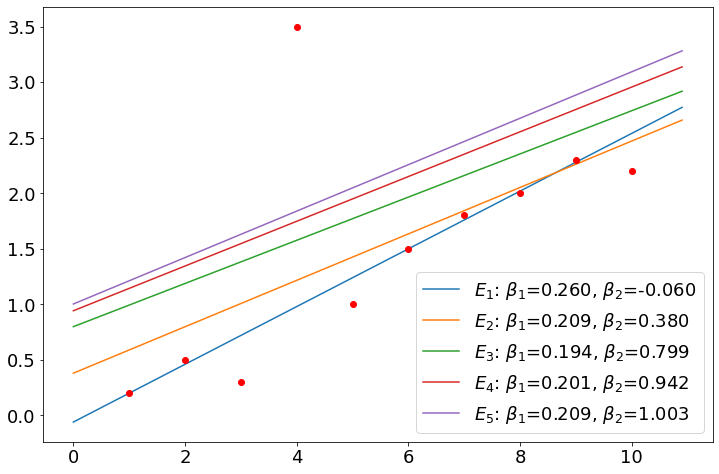

In [10]:
plt.figure()
for i in range(1,6):
    pe = scipy.optimize.fmin(mpe,x0,args=(t2,i,))
    label_pe= r'$E_{0}$: $\beta_1$={1:.3f}, $\beta_2$={2:.3f}'.format(i,pe[0],pe[1])
    xf = np.arange(0,11,0.1)
    yp = np.polyval(pe,xf)
    plt.plot(xf,yp,label=label_pe)
x,y = t2
plt.plot(x,y,'o',color='r',linewidth=2)

plt.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.138576
         Iterations: 56
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.028800
         Iterations: 54
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.005661
         Iterations: 55
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.001163
         Iterations: 58
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 0.000246
         Iterations: 59
         Function evaluations: 112


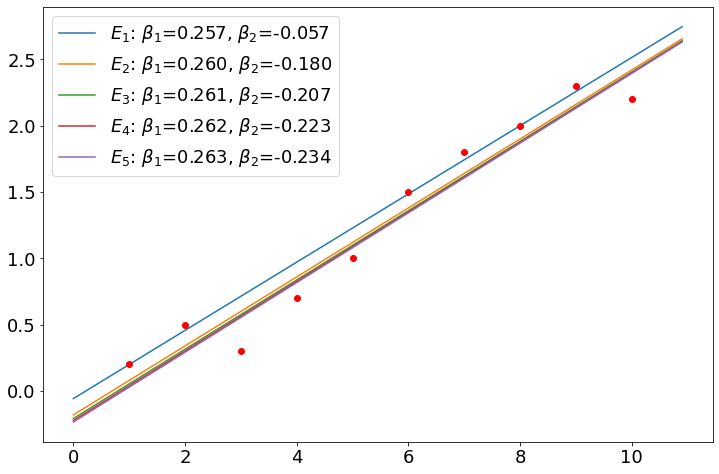

In [11]:
plt.figure()
for i in range(1,6):
    pe = scipy.optimize.fmin(mpe,x0,args=(t1,i,))
    label_pe= r'$E_{0}$: $\beta_1$={1:.3f}, $\beta_2$={2:.3f}'.format(i,pe[0],pe[1])
    xf = np.arange(0,11,0.1)
    yp = np.polyval(pe,xf)
    plt.plot(xf,yp,label=label_pe)
x,y = t1
plt.plot(x,y,'o',color='r',linewidth=2)

plt.legend()
plt.show()